In [18]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as sp
%load_ext google.cloud.bigquery
import pickle
from matplotlib import pyplot as plt
from datetime import datetime
with open('design.pkl','rb') as f:
    set_params = pickle.load(f)
plt.rcParams.update(set_params)

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [19]:
df = pd.read_csv('van_ZEV_compliance_tracker.csv', index_col=0)

In [20]:
# fig, ax = plt.subplots()

# dfa.plot(x='make', y=[
#     'ZEV Surplus', 
#     'ZEV Surplus after CO2', 
#     # 'ZEV Surplus after CO2 - Proposed'
# ], kind='barh', ax=ax, figsize=(10, 10))
# ax.set_xlabel('ZEV Credit Surplus/Shortfall')
# ax.set_ylabel('')

# ax.set_title('ZEV Mandate: Sales vs Year 1 Target as of {}'.format(last_month))

# plt.savefig('plots/top_20_last_12_months_{}.png'.format(this_month), transparent=False, bbox_inches='tight', dpi=300, facecolor='white')
# plt.show()

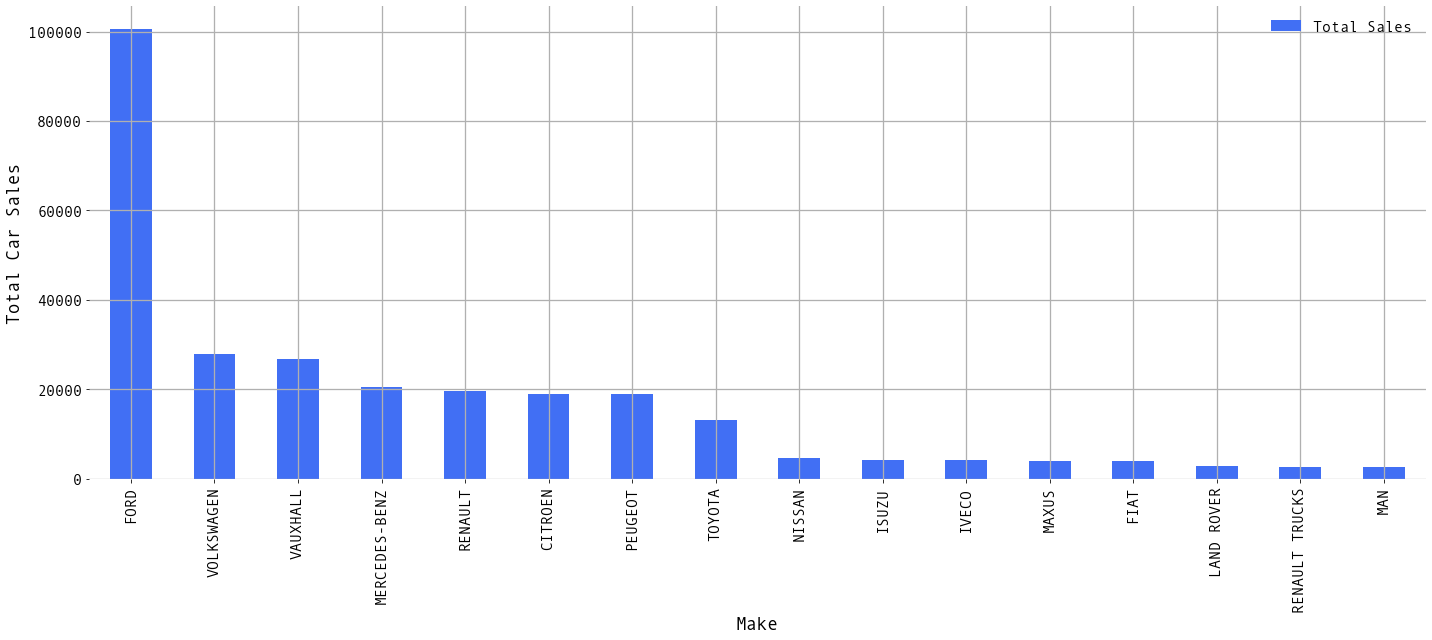

In [21]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Total Sales', kind='bar', ax=ax)

ax.set_ylabel('Total Car Sales')

plt.savefig('plots/how_s1_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')


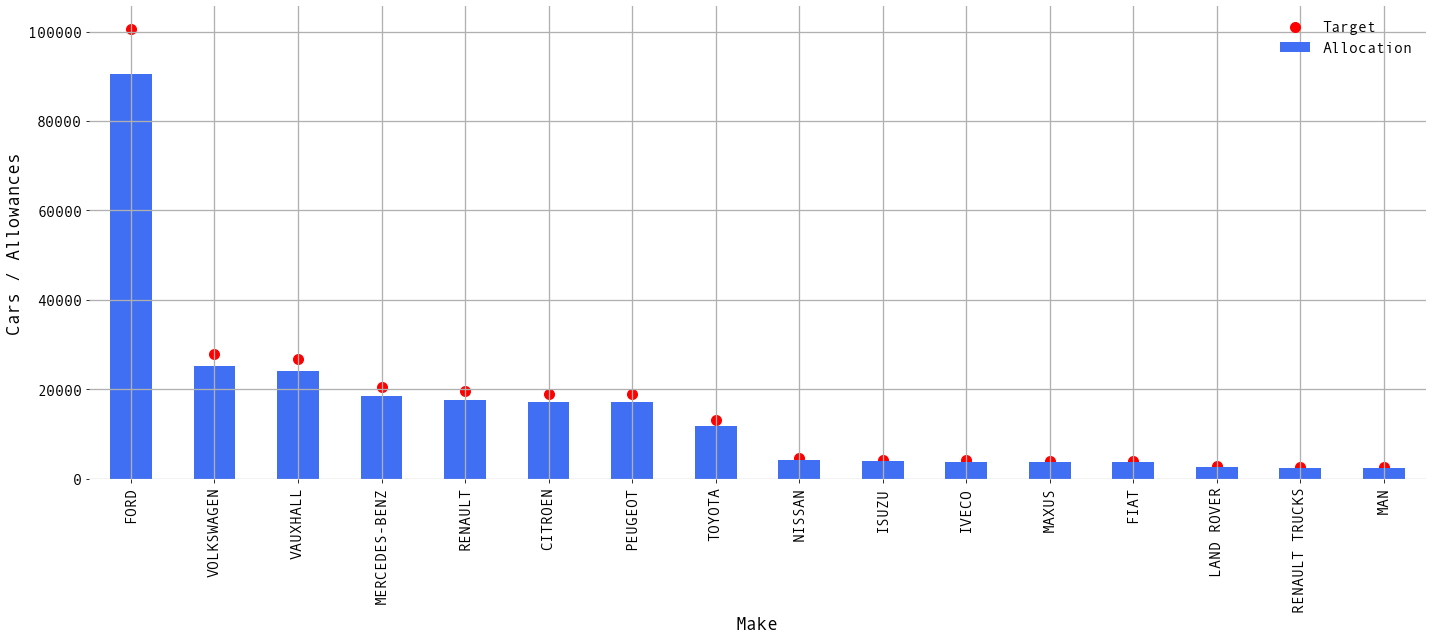

In [22]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Allocated allowances', kind='bar', ax=ax, label='Allocated Allowances')
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s2_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

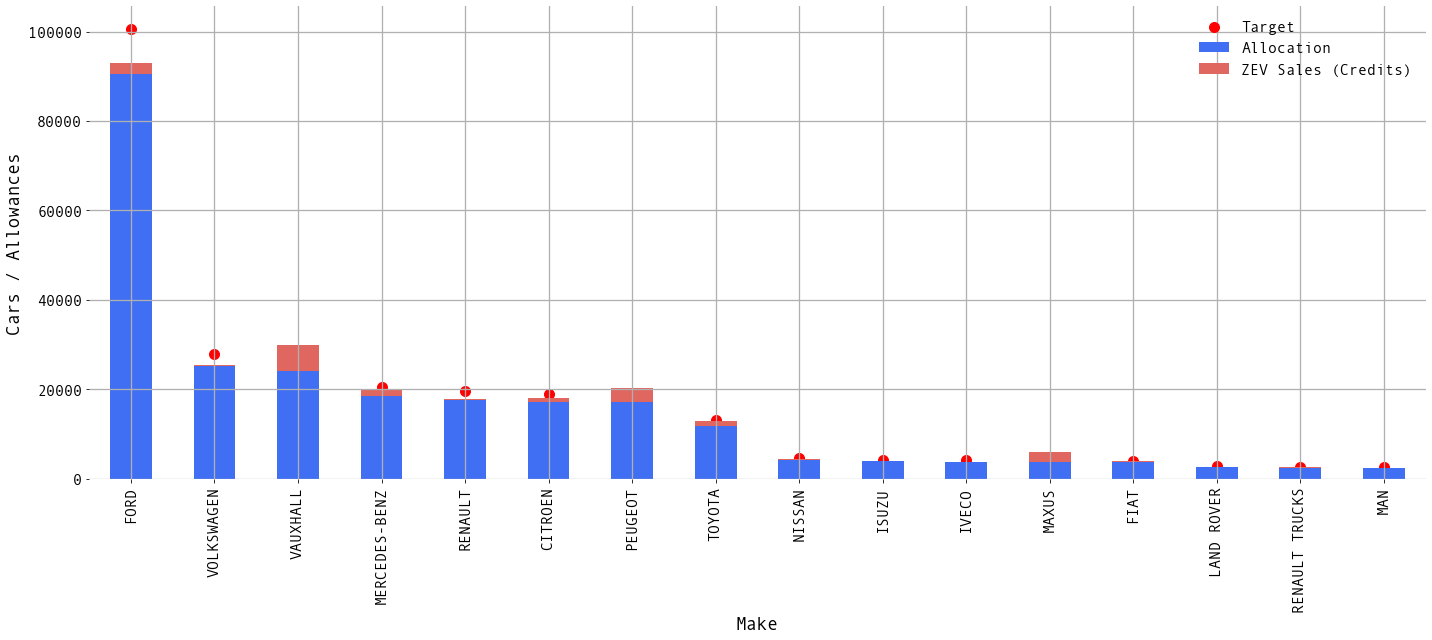

In [23]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s3_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [24]:
df['ZEV Credits available from CO2'] = df['Allowance Surplus (after CO2 transfers)'] - df['Allowance Surplus']
df

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2
15,FORD,100590,97858,2338,203.28,212.99,90531.0,-7327.0,-7327.00,0.00
14,VOLKSWAGEN,27955,27582,373,201.45,195.70,25159.5,-2422.5,-1723.62,698.88
13,VAUXHALL,26893,21204,5681,190.11,190.71,24203.7,2999.7,2999.70,0.00
12,MERCEDES-BENZ,20500,17324,1481,342.81,269.47,18450.0,1126.0,1638.50,512.50
11,RENAULT,19620,18250,279,215.65,212.38,17658.0,-592.0,-235.04,356.96
10,CITROEN,19041,17998,1022,180.89,192.81,17136.9,-861.1,-861.10,0.00
9,PEUGEOT,19012,15911,3086,183.07,189.61,17110.8,1199.8,1199.80,0.00
8,TOYOTA,13051,11941,1108,220.20,210.30,11745.9,-195.1,131.17,326.27
7,NISSAN,4761,4344,51,230.81,223.60,4284.9,-59.1,59.93,119.03
6,ISUZU,4298,4293,0,268.67,227.56,3868.2,-424.8,-317.35,107.45


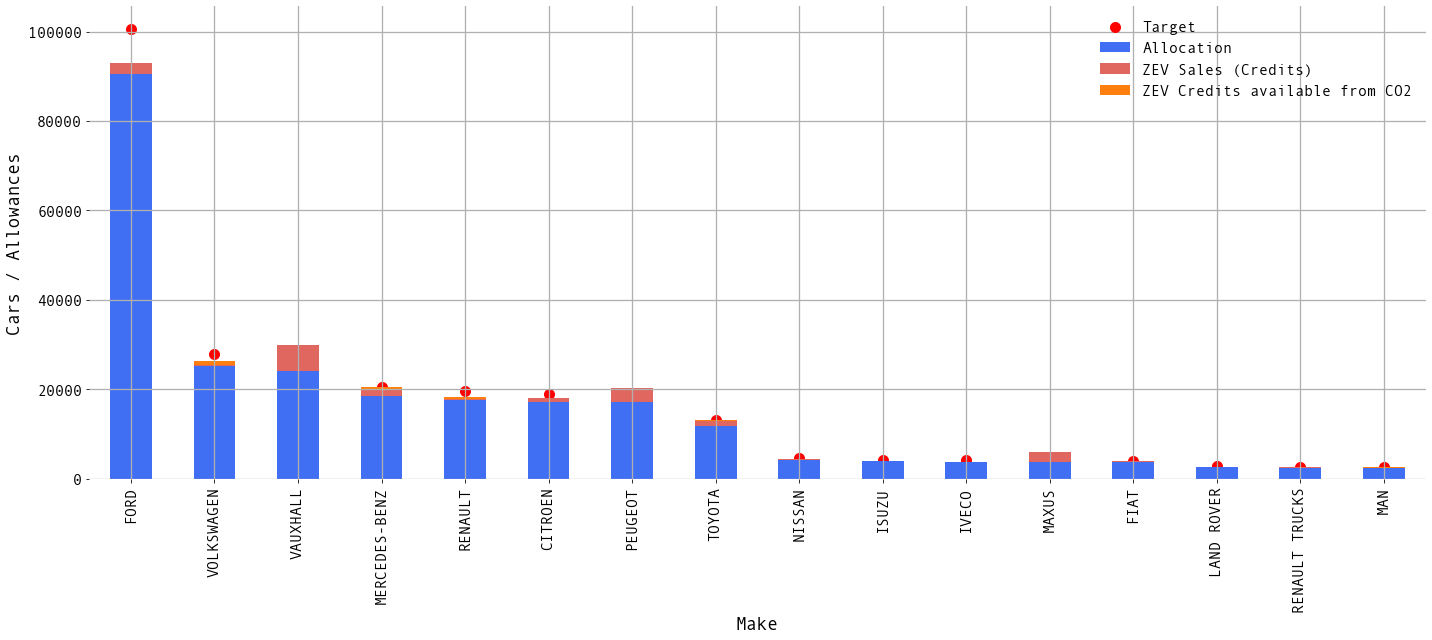

In [25]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)', 'ZEV Credits available from CO2'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s4_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

## Trading

In [26]:
allowances_for_sale = df[df['Allowance Surplus (after CO2 transfers)']>0]['Allowance Surplus (after CO2 transfers)'].sum()
allowances_needed = df[df['Allowance Surplus (after CO2 transfers)']<0]['Allowance Surplus (after CO2 transfers)'].sum()

In [27]:
market_deficit_percentage = allowances_for_sale / (-1*allowances_needed)

In [28]:
df['Credit Sales'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: (-1*x) if x>0 else 0)

df['Credit Purchases'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: market_deficit_percentage * (-1*x) if x<0 else 0)
df['Credits Used for Compliance'] = df.apply(lambda row: row['ZEV Sales'] if row['Allowance Surplus (after CO2 transfers)'] < 0 else row['Total Sales'] - row['Allocated allowances'], axis=1)

In [29]:
df['Credit Sales'].sum()

-9489.59

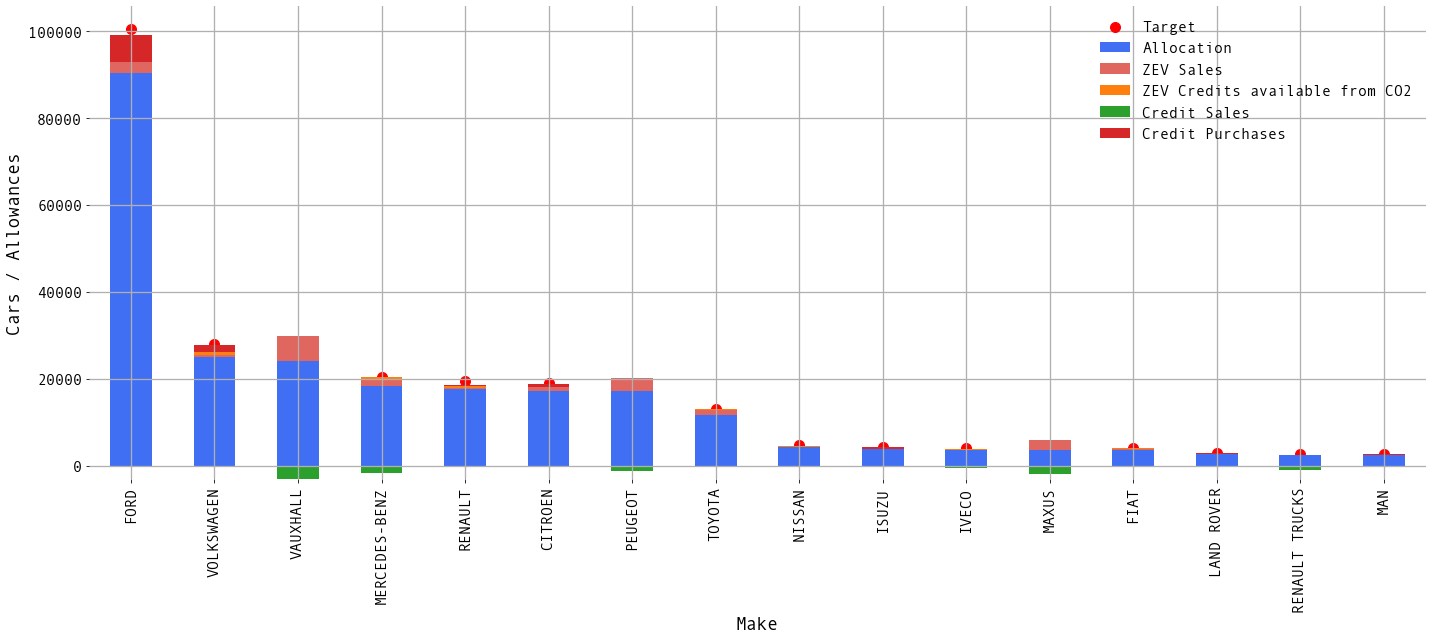

In [30]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(
    x='Make', 
    y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], 
    kind='bar', 
    ax=ax, 
    label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s5_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [31]:
df['Allowance Surplus after Trading'] = df.apply(lambda row: row['Credit Purchases'] + row['Allowance Surplus (after CO2 transfers)'] + row['Credit Sales'], axis=1)

In [32]:
df['Borrowable'] = df.apply(lambda row: row['Total Sales'] *.16, axis=1)

In [33]:
df.sort_values('Allowance Surplus after Trading')

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2,Credit Sales,Credit Purchases,Credits Used for Compliance,Allowance Surplus after Trading,Borrowable
15,FORD,100590,97858,2338,203.28,212.99,90531.0,-7327.0,-7327.00,0.00,0.00,6418.532164,2338.0,-908.467836,16094.40
14,VOLKSWAGEN,27955,27582,373,201.45,195.70,25159.5,-2422.5,-1723.62,698.88,0.00,1509.909978,373.0,-213.710022,4472.80
10,CITROEN,19041,17998,1022,180.89,192.81,17136.9,-861.1,-861.10,0.00,0.00,754.333021,1022.0,-106.766979,3046.56
6,ISUZU,4298,4293,0,268.67,227.56,3868.2,-424.8,-317.35,107.45,0.00,278.002072,0.0,-39.347928,687.68
11,RENAULT,19620,18250,279,215.65,212.38,17658.0,-592.0,-235.04,356.96,0.00,205.897612,279.0,-29.142388,3139.20
2,LAND ROVER,2921,2921,0,243.05,229.80,2628.9,-292.1,-219.07,73.03,0.00,191.907717,0.0,-27.162283,467.36
0,MAN,2680,2599,80,543.09,243.49,2412.0,-187.0,-120.00,67.00,0.00,105.121313,80.0,-14.878687,428.80
3,FIAT,4074,3798,276,213.25,189.87,3666.6,-131.4,-29.55,101.85,0.00,25.886123,276.0,-3.663877,651.84
13,VAUXHALL,26893,21204,5681,190.11,190.71,24203.7,2999.7,2999.70,0.00,-2999.70,0.000000,2689.3,0.000000,4302.88
12,MERCEDES-BENZ,20500,17324,1481,342.81,269.47,18450.0,1126.0,1638.50,512.50,-1638.50,0.000000,2050.0,0.000000,3280.00
